# Mixture Density Networks

A mixture density network is a probabilistic model of the form

$$
    p({\bf t}|{\bf x}) = \sum_{k=1}^K \pi_k({\bf x})\mathcal{N}({\bf t}, {\boldsymbol \mu}_k({\bf x}), {\bf I}\sigma_k^2)
$$

Where the coefficients in the model, namely $\{\pi_k({\bf x})\}_k$, $\{{\boldsymbol \mu}_k({\bf x})\}_k$, and $\{\sigma_k({\bf x})\}_k$ are modelled as the outputs of a feedforward neural nework.

A mixture density network is of use whenever we are presented with multimodal or nongauassian data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed, normal, uniform
from sklearn.neural_network import MLPRegressor

In [2]:
seed(2718)
nsamples = 100
xn = uniform(low=0, high=1, size=nsamples)
noise = uniform(low=-0.1, high=0.1, size=nsamples)
tn = xn + 0.3 * np.sin(2 * np.pi * xn) + noise

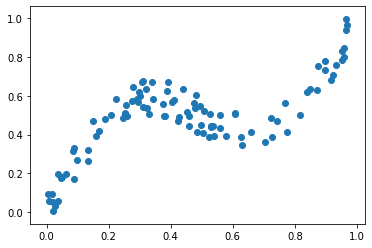

In [3]:
plt.scatter(xn, tn)

In [4]:
xrange = np.linspace(0, 1, 100)

In [5]:
nn_forward = MLPRegressor(hidden_layer_sizes=(6, 6),
                  activation="tanh",
                  learning_rate_init=0.1,
                  solver="lbfgs", random_state=314)
nn_forward.fit(xn.reshape(-1, 1), tn)
yn_forward = nn_forward.predict(xrange.reshape(-1, 1))

In [6]:
nn_inverse = MLPRegressor(hidden_layer_sizes=(6, 6),
                  activation="tanh", 
                  learning_rate_init=0.1, tol=1e-6,
                  solver="lbfgs", random_state=3141)

nn_inverse.fit(tn.reshape(-1, 1), xn)
yn_inverse = nn_inverse.predict(xrange.reshape(-1, 1))

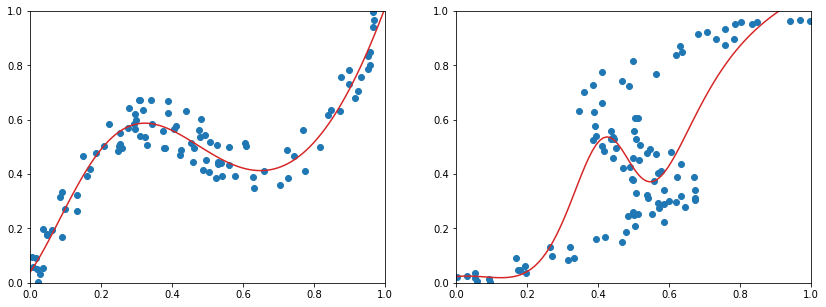

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].scatter(xn, tn)
ax[0].plot(xrange, yn_forward, c="tab:red")

ax[1].scatter(tn, xn)
ax[1].plot(xrange, yn_inverse, c="tab:red")

for axi in ax:
    axi.set_xlim(0, 1)
    axi.set_ylim(0, 1)

Choosing a least squares error function corresponds to a maximum likelihood under a Gaussian assumption. If the distribution of the parameters to fit is highly non-gaussian, the model cannot caputre the nature of the data.

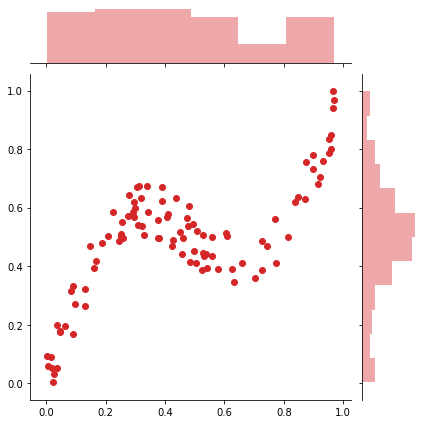

In [8]:
sns.jointplot(xn, tn, color="tab:red")

## The Mixture Density Network

In [9]:
from scipy.optimize import minimize

In [10]:
w1 = np.random.randn(1, 6)
w2 = np.random.randn(6, 1)

In [11]:
w = np.random.randn(7, 2) * 0.5

In [12]:
def fforward(w, X):
    """
    A two-layered feed-forward activation function with "n" units
    at each hidden layer; one input unit; and one output unit
    """
    return np.tanh(np.tanh(X @ w[1:, [0]].T + w[0, 0]) @ w[1:, [1]] + w[0, 1])

def nntrain(w, X, y):
    w = w.reshape(-1, 2)
    t = fforward(w, X)
    return np.mean((t - y) ** 2) 

In [19]:
X = xn.reshape(-1, 1)
nnw = minimize(nntrain, w.ravel(), (X, tn), method="l-bfgs-b", tol=1e-6)
nnw

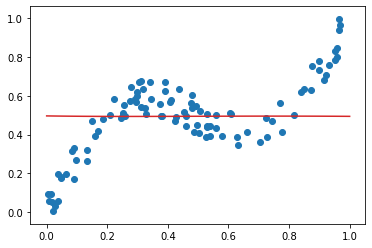

In [21]:
w0 = nnw.x.reshape(-1, 2)

plt.scatter(X, tn)
plt.plot(xrange, fforward(w0, xrange.reshape(-1, 1)), c="tab:red")